# Bayesian linear regression
code sources:


https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5

https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e

data:

https://archive.ics.uci.edu/ml/datasets/student+performance

## EDA
Investigating which factors influence the final grade (G3) and if one may predict it in advance


these grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [17]:
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Text(0.5, 1.0, 'Distribution of Final Grades')

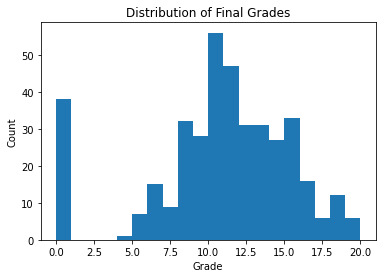

In [15]:
# Histogram of grades
plt.hist(df['G3'], bins=20)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

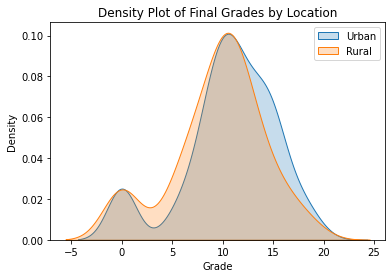

In [27]:
# Density plots

sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label = 'Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label = 'Rural', shade = True)
# Add labeling
plt.title('Density Plot of Final Grades by Location')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.legend()

In [28]:
df['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

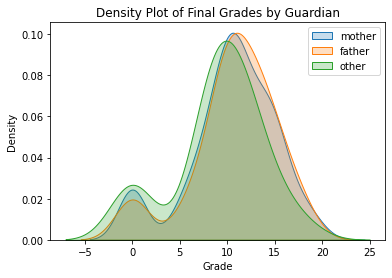

In [29]:
# Density plots

sns.kdeplot(df.loc[df['guardian'] == 'mother', 'G3'], label = 'mother', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'father', 'G3'], label = 'father', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'G3'], label = 'other', shade = True)
# Add labeling
plt.title('Density Plot of Final Grades by Guardian')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.legend()

In [31]:
# feature selection
# Find correlations and sort
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

## Model implementation

In [ ]:
# to do: https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7